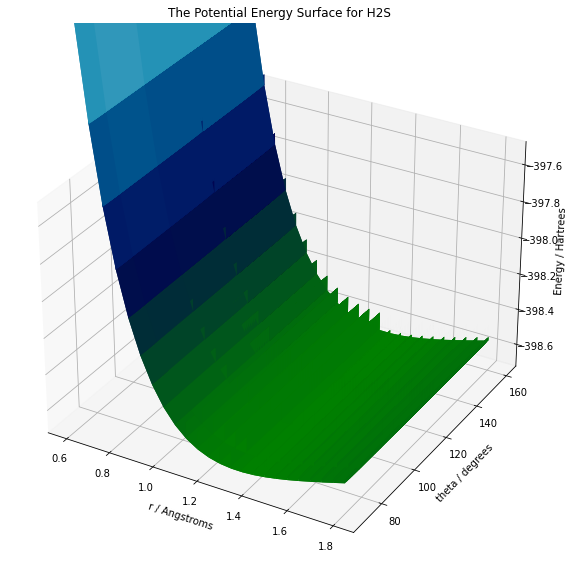

In [122]:
import glob
import re
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

#MAKE INTO FUNCTIONS

pattern_e = re.compile('SCF Done')
pattern_tr = re.compile('Input=')
folder_contents = []
search_string = 'tara'
match_list = []
e_list = []
t_list = []
r_list = []

for name in glob.glob('/Users/T/H2Soutfiles/*'): 
    folder_contents.append(name)
    
for file in folder_contents:
    read_file = open(file, 'r+')
    
    for line in read_file:
        for match in re.finditer(pattern_e, line):
            e_list.append(float(line[22:36]))
        for match in re.finditer(pattern_tr, line):
            t_list.append(float(line[21:25]))
            r_list.append(float(line[12:16]))

#print(e_list)
#print(t_list)
#print(r_list)
            
fig = plt.figure(figsize=(20,10))
#plt.plot(t_list,r_list)
ax = fig.gca(projection='3d')
x, y = meshgrid(r_list, t_list)
z = tile(e_list, (len(e_list),1))
#surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#ax = plt.axes(projection='3d')
#ax.contour3D(x, y, z, 50, cmap='viridis')


#ax.plot_wireframe(x, y, z)
ax.plot_surface(x, y, z, cmap='ocean')

# customizing the z-axis
ax.set_zlim(-398.7, -397.5)

ax.set_title('The Potential Energy Surface for H2S')
ax.set_xlabel('r / Angstroms')
ax.set_ylabel('theta / degrees')
ax.set_zlabel('Energy / Hartrees')

plt.show()

In [94]:
# finding minimum energy

min_index = e_list.index(min(e_list, key=float))
min_e = e_list[min_index]
min_r = r_list[min_index]
min_t = t_list[min_index]

In [ ]:
# calculating vibrational frequencies

mu = 1.66*(10^-27)

v1 = 1/(2*pi)*(k_r/(2*mu))^0.5
v2 = 1/(2*pi)*(k_t/(min_r^2*0.5*mu))^0.5